In [1]:
import os
train_data = os.listdir('train/')
print(train_data[0])

dog.8011.jpg


In [2]:
labels=[]

for s0mething in train_data:
    if 'cat' in s0mething:
        labels.append(0)
    if 'dog' in s0mething:
        labels.append(1)


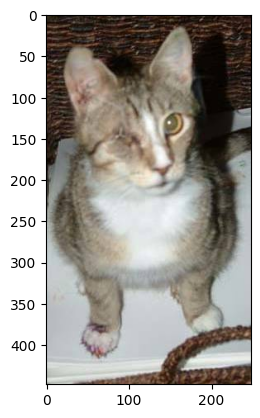

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img

cat_image = img.imread("train/cat.1159.jpg")
plt.imshow(cat_image)

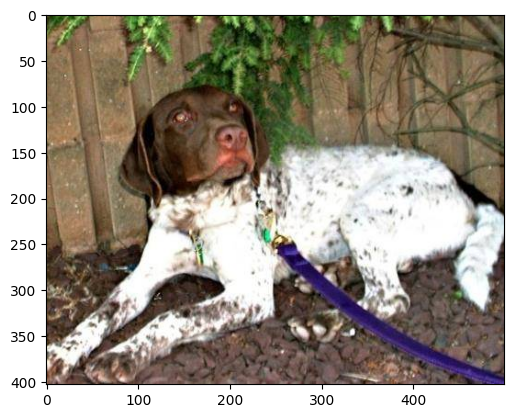

In [4]:

dog_image = img.imread("train/dog.1159.jpg")
plt.imshow(dog_image)

In [5]:
#import PIL 

#for file_name in train_data:
#    img = PIL.Image.open('train/'+file_name)
#    img= img.resize((224,224))
#    img= img.convert("RGB")

#    img.save('resized/'+ file_name)

In [6]:
import cv2
import numpy as np

cat_n_dog_img=[]


for file_name in train_data:
    img=cv2.imread('resized/'+file_name)
    cat_n_dog_img.append(img)

cat_n_dog_img=np.asarray(cat_n_dog_img)




Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG 

In [7]:
from sklearn.model_selection import train_test_split

labels=np.asarray(labels)

x_train, x_test, y_train, y_test =train_test_split(cat_n_dog_img,labels,test_size=0.2,random_state=2)

x_train_scaled=x_train/255
x_test_scaled=x_test/255



KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(x_train_scaled,y_train, epochs=2)

: 

: 